**This notebook uses a pixel-value-based filter to remove the faint black artifacts, which are inherited from the training dataset, from the generated images.**

Import libraries

In [48]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image

Load generated images

In [49]:
lgq_raw = Image.open('Liu_Gongquan_Style.png')
mf_raw = Image.open('Mi_Fu_Style.png')

Raw generated Liu Gongquan style images


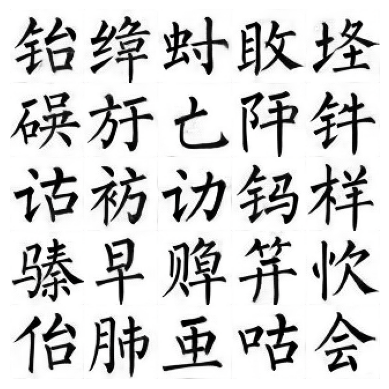

In [50]:
print("Raw generated Liu Gongquan style images")
plt.imshow(lgq_raw)
plt.axis("off");

Raw generated Mi Fu style images


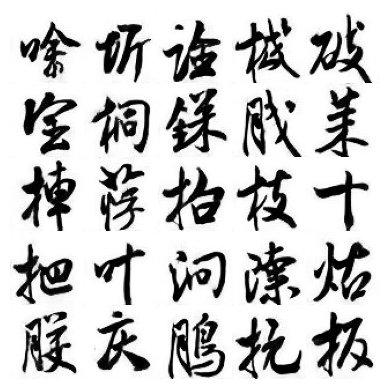

In [51]:
print("Raw generated Mi Fu style images")
plt.imshow(mf_raw)
plt.axis("off");

In [52]:
lgq_raw_tensor = transforms.ToTensor()(lgq_raw)
mf_raw_tensor = transforms.ToTensor()(mf_raw)

Pixel-value-based filter

In [53]:
lgq_raw_cutoff, mf_raw_cutoff = 0.8, 0.8

In [54]:
lgq_mask = lgq_raw_tensor > lgq_raw_cutoff
mf_mask = mf_raw_tensor > mf_raw_cutoff

In [55]:
lgq_raw_tensor_filtered = lgq_raw_tensor + (1 - lgq_raw_tensor) * lgq_mask

In [56]:
mf_raw_tensor_filtered = mf_raw_tensor + (1 - mf_raw_tensor) * mf_mask

Filtered generated Liu Gongquan style images


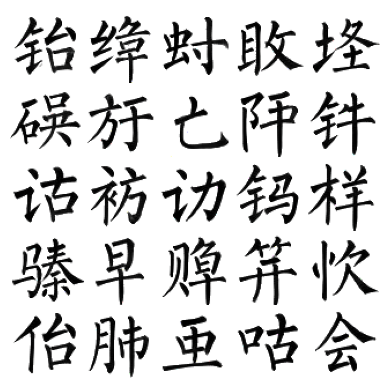

In [57]:
print("Filtered generated Liu Gongquan style images")
plt.imshow(lgq_raw_tensor_filtered.permute(1,2,0))
plt.axis('off');

Raw generated Mi Fu style images


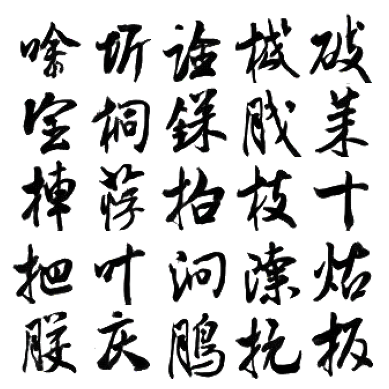

In [58]:
print("Raw generated Mi Fu style images")
plt.imshow(mf_raw_tensor_filtered.permute(1,2,0))
plt.axis('off');

Save filtered images

In [59]:
save_image(lgq_raw_tensor_filtered, "Liu_Gongquan_Style_filtered.png")

In [60]:
save_image(mf_raw_tensor_filtered, "Mi_Fu_Style_filtered.png")